In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d=pd.read_csv("/content/program_5_dataset.csv")

In [3]:
d.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
d.shape

(615, 14)

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         613 non-null    float64
 5   ALP         595 non-null    float64
 6   ALT         612 non-null    float64
 7   AST         613 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        604 non-null    float64
 11  CREA        614 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [6]:
d.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

Handling missing values

In [7]:
d.fillna(d.mean(), inplace=True)


<ipython-input-7-ab43919c5303>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  d.fillna(d.mean(), inplace=True)


plotting linear regression


Intercept: 72.25442086883274
Coefficient (CREA): -0.003914818664546755
MSE (Train): 28.429575138093043
MSE (Test): 31.659951887601213
R-squared (Train): 0.0016145243641475515
R-squared (Test): -0.01050893132580022


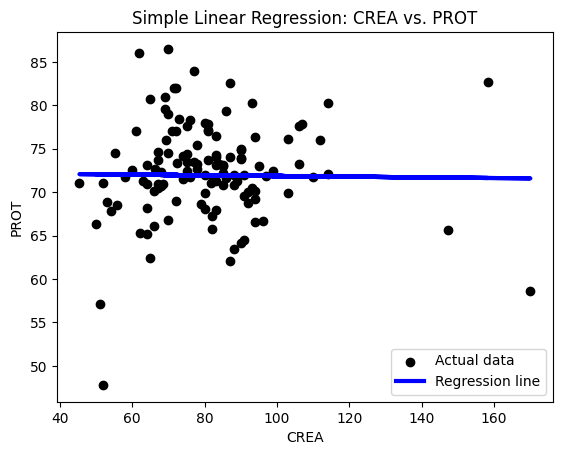

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = d[['CREA']]
y = d['PROT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Intercept:", lm.intercept_)
print("Coefficient (CREA):", lm.coef_[0])

print("MSE (Train):", mse_train)
print("MSE (Test):", mse_test)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

# Plotting the regression line
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred_test, color='blue', linewidth=3, label='Regression line')
plt.title('Simple Linear Regression: CREA vs. PROT')
plt.xlabel('CREA')
plt.ylabel('PROT')
plt.legend()
plt.show()

we can see that linear regression does not form a good fit line.

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
selected_columns = d.columns.difference(['Patient ID/No.', 'Category', 'Age', 'Sex'])

X_vif = d[selected_columns]
vif_data = pd.DataFrame()
vif_data["Variable"] = selected_columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)
final_predictors = vif_data[vif_data['VIF'] < 5]['Variable']
print("Final List of Predictors:", final_predictors.tolist())


      Variable         VIF
0          ALB   91.848300
1          ALP   10.524429
2          ALT    2.711856
3          AST    3.621866
4          BIL    1.647761
5          CHE   22.813947
6         CHOL   30.465820
7         CREA    3.784397
8          GGT    2.667932
9         PROT  138.129550
10  Unnamed: 0    4.821647
Final List of Predictors: ['ALT', 'AST', 'BIL', 'CREA', 'GGT', 'Unnamed: 0']


In [10]:
correlation_matrix = d[['ALB', 'ALP', 'CHE', 'CHOL', 'PROT']].corr()
print(correlation_matrix)

           ALB       ALP       CHE      CHOL      PROT
ALB   1.000000 -0.142307  0.375729  0.204540  0.549904
ALP  -0.142307  1.000000  0.030682  0.121273 -0.055331
CHE   0.375729  0.030682  1.000000  0.420051  0.293184
CHOL  0.204540  0.121273  0.420051  1.000000  0.206623
PROT  0.549904 -0.055331  0.293184  0.206623  1.000000


In [11]:
from sklearn.model_selection import train_test_split
X = d.drop(['PROT'], axis=1)  # Adjust columns accordingly
y = d['PROT']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print("Training set - Features:", X_train.shape)
print("Testing set - Features:", X_test.shape)
print("Training set - Target:", y_train.shape)
print("Testing set - Target:", y_test.shape)


Training set - Features: (492, 13)
Testing set - Features: (123, 13)
Training set - Target: (492,)
Testing set - Target: (123,)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train_selected = X_train[['ALT', 'AST', 'BIL', 'CREA', 'GGT', 'Unnamed: 0']]
model = LinearRegression()
model.fit(X_train_selected, y_train)

y_train_pred = model.predict(X_train_selected)
print("Training Set Metrics:")
print("Mean Squared Error:", mean_squared_error(y_train, y_train_pred))
print("R-squared:", r2_score(y_train, y_train_pred))

X_test_selected = X_test[['ALT', 'AST', 'BIL', 'CREA', 'GGT', 'Unnamed: 0']]
y_test_pred = model.predict(X_test_selected)
print("\nTesting Set Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("R-squared:", r2_score(y_test, y_test_pred))


Training Set Metrics:
Mean Squared Error: 27.563578383755367
R-squared: 0.03202646605792403

Testing Set Metrics:
Mean Squared Error: 32.923439718214624
R-squared: -0.05083640061536432


polynomial regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_poly = d[['ALB', 'ALP', 'CHE', 'CHOL', 'PROT']].values
y_poly = d['PROT'].values

# Split the data into training and testing sets
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

# Specify degrees for polynomial features
degrees = [2, 3, 4]  # You can choose other degrees as well

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train_transformed = poly.fit_transform(X_poly_train)
    X_poly_test_transformed = poly.transform(X_poly_test)

    # Initialize linear regression model
    model_poly = LinearRegression()

    # Fit the model to the transformed training data
    model_poly.fit(X_poly_train_transformed, y_poly_train)

    # Predict the target variable on the transformed testing set
    y_poly_test_pred = model_poly.predict(X_poly_test_transformed)

    # Evaluate the model
    print(f"\nPolynomial Regression (Degree {degree}):")
    print("Mean Squared Error:", mean_squared_error(y_poly_test, y_poly_test_pred))
    print("R-squared:", r2_score(y_poly_test, y_poly_test_pred))



Polynomial Regression (Degree 2):
Mean Squared Error: 2.987317480121237e-26
R-squared: 1.0

Polynomial Regression (Degree 3):
Mean Squared Error: 1.231629686355519e-19
R-squared: 1.0

Polynomial Regression (Degree 4):
Mean Squared Error: 3.7328651334460043e-17
R-squared: 1.0


In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'df' is your DataFrame and 'categorical_columns' is a list of columns to encode
categorical_columns = ['Category', 'Sex']  # Add other categorical columns if present

# Create a copy of the original DataFrame
d_encoded = d.copy()

# Apply OneHotEncoder to each categorical column
for column in categorical_columns:
    encoder = OneHotEncoder(sparse=False, drop='first')  # Use drop='first' to avoid multicollinearity
    encoded_values = encoder.fit_transform(d[[column]])

    # Create new column names
    new_columns = [f"{column}_{value}" for value in encoder.get_feature_names_out([column])]

    # Replace the original column with the encoded values
    d_encoded = pd.concat([d_encoded, pd.DataFrame(encoded_values, columns=new_columns)], axis=1)
    d_encoded.drop(column, axis=1, inplace=True)

# Display the resulting DataFrame with categorical columns converted to numerical
print(d_encoded.head())


   Unnamed: 0  Age   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  \
0           1   32  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1   
1           2   32  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6   
2           3   32  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2   
3           4   32  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8   
4           5   32  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9   

   PROT  Category_Category_0s=suspect Blood Donor  \
0  69.0                                       0.0   
1  76.5                                       0.0   
2  79.3                                       0.0   
3  75.7                                       0.0   
4  68.7                                       0.0   

   Category_Category_1=Hepatitis  Category_Category_2=Fibrosis  \
0                            0.0                           0.0   
1                            0.0                           0.0   
2             

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         615 non-null    float64
 5   ALP         615 non-null    float64
 6   ALT         615 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        615 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        615 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [26]:
X_ridge = d.drop(['PROT'], axis=1)
y_ridge = d['PROT']

X_ridge_train, X_ridge_test, y_ridge_train, y_ridge_test = train_test_split(X_ridge, y_ridge, test_size=0.2, random_state=42)



In [28]:
print(X_ridge_train.dtypes)
print(X_ridge_test.dtypes)


Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
dtype: object
Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
dtype: object


In [29]:
print(X_ridge_train['Category'].unique())
print(X_ridge_train['Sex'].unique())

print(X_ridge_test['Category'].unique())
print(X_ridge_test['Sex'].unique())


['0=Blood Donor' '2=Fibrosis' '3=Cirrhosis' '1=Hepatitis'
 '0s=suspect Blood Donor']
['m' 'f']
['0=Blood Donor' '3=Cirrhosis' '1=Hepatitis' '2=Fibrosis'
 '0s=suspect Blood Donor']
['m' 'f']


In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=['Category', 'Sex'])
X_test = pd.get_dummies(X_test, columns=['Category', 'Sex'])


In [32]:
from sklearn.linear_model import Ridge

alphas = np.linspace(0.1, 150, 13)

for alpha in alphas:
    model_ridge = Ridge(alpha=alpha)

    # Fit the model to the training data
    model_ridge.fit(X_train, y_train)

    # Predict the target variable on the testing set
    y_test_pred = model_ridge.predict(X_test)

    print(f"\nRidge Regression (Alpha {alpha}):")
    print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
    print("R-squared:", r2_score(y_test, y_test_pred))



Ridge Regression (Alpha 0.1):
Mean Squared Error: 21.20491655748291
R-squared: 0.3231904569714005

Ridge Regression (Alpha 12.591666666666667):
Mean Squared Error: 20.942626970440486
R-squared: 0.33156210488928384

Ridge Regression (Alpha 25.083333333333336):
Mean Squared Error: 21.542280288250446
R-squared: 0.3124226243399335

Ridge Regression (Alpha 37.575):
Mean Squared Error: 21.84070358437484
R-squared: 0.3028976760039418

Ridge Regression (Alpha 50.06666666666667):
Mean Squared Error: 22.016235420949197
R-squared: 0.29729512520979884

Ridge Regression (Alpha 62.55833333333334):
Mean Squared Error: 22.13057949411114
R-squared: 0.2936455395255083

Ridge Regression (Alpha 75.05):
Mean Squared Error: 22.21011348888886
R-squared: 0.29110700717548343

Ridge Regression (Alpha 87.54166666666666):
Mean Squared Error: 22.267965309586344
R-squared: 0.28926051727190405

Ridge Regression (Alpha 100.03333333333333):
Mean Squared Error: 22.31140331515534
R-squared: 0.2878740814130537

Ridge Re

In [33]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X_lasso_train and y_lasso_train are your training data
# X_lasso_train should only contain the selected predictor with the highest VIF

# Split the data into training and testing sets
X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test = train_test_split(
    X_ridge[['AST']], y_ridge, test_size=0.2, random_state=42
)

# Specify alphas for LASSO
alphas_lasso = np.linspace(0.1, 100, 100)

# Create LASSO model with cross-validation
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5)
lasso_cv.fit(X_lasso_train, y_lasso_train)

# Predict the target variable on the testing set
y_lasso_test_pred = lasso_cv.predict(X_lasso_test)

# Evaluate the model
print(f"\nLASSO Regression with Cross-Validation:")
print("Best Alpha:", lasso_cv.alpha_)
print("Mean Squared Error:", mean_squared_error(y_lasso_test, y_lasso_test_pred))
print("R-squared:", r2_score(y_lasso_test, y_lasso_test_pred))



LASSO Regression with Cross-Validation:
Best Alpha: 100.0
Mean Squared Error: 31.624271067002006
R-squared: -0.009370086010414669


In [38]:
from sklearn.pipeline import make_pipeline



Ridge Regression:
Mean Squared Error (Train): 15.763298752256164
Mean Squared Error (Test): 21.20491655748291
R-squared (Train): 0.4464268830639673
R-squared (Test): 0.3231904569714005
Intercept: 49.86162084197446
Coefficients: [-5.53517120e-03 -9.70922905e-03  4.27236014e-01  9.04825666e-03
  6.14612663e-03  1.29783158e-02 -1.19214811e-03  3.79210978e-01
  4.85449360e-01 -7.64528435e-03  3.37591411e-03 -2.55541735e-01
 -1.29582009e+01  3.93265217e+00  4.54773843e+00  4.73335201e+00
  8.82708446e-01 -8.82708446e-01]

LASSO Regression:
Mean Squared Error (Train): 17.672366238797142
Mean Squared Error (Test): 22.63748580466971
R-squared (Train): 0.3793845427787863
R-squared (Test): 0.2774663186605062

Polynomial Regression:
Mean Squared Error (Train): 8.583718578802875
Mean Squared Error (Test): 651.4180208106865
R-squared (Train): 0.6985582825492324
R-squared (Test): -19.79168440914676


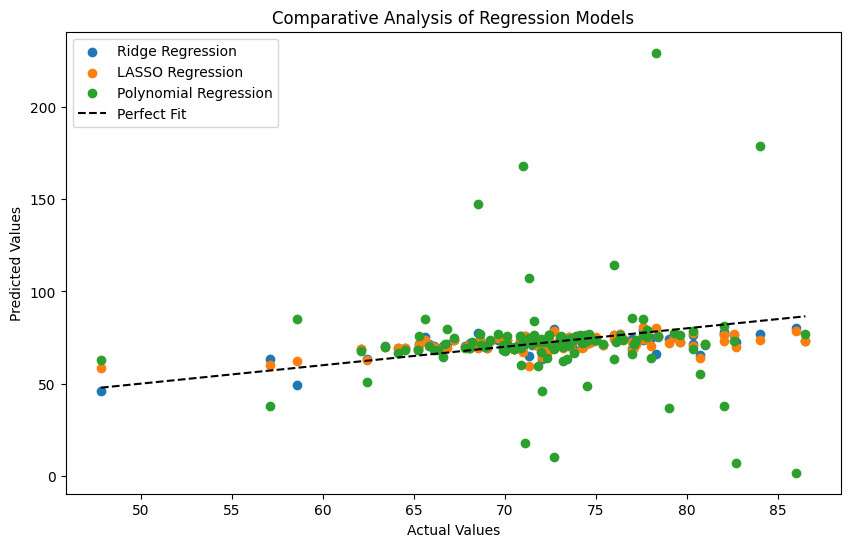

In [39]:
alphas_ridge = np.linspace(0.1, 150, 13)
ridge_cv = RidgeCV(alphas=alphas_ridge, cv=5)
ridge_cv.fit(X_train, y_train)

# LASSO Regression
alphas_lasso = np.linspace(0.1, 100, 100)
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5)
lasso_cv.fit(X_train, y_train)

# Polynomial Regression
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

models = {'Ridge Regression': ridge_cv, 'LASSO Regression': lasso_cv, 'Polynomial Regression': poly_model}
for model_name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"\n{model_name}:")
    print("Mean Squared Error (Train):", mse_train)
    print("Mean Squared Error (Test):", mse_test)
    print("R-squared (Train):", r2_train)
    print("R-squared (Test):", r2_test)

    if isinstance(model, RidgeCV) or isinstance(model, LinearRegression):
        print("Intercept:", model.intercept_)
        print("Coefficients:", model.coef_)

# Comparative analysis graph
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=model_name)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparative Analysis of Regression Models')
plt.legend()
plt.show()